## Plotting for supplementary figure

This makes method of moments calculations based on Dahmer and Kersting (2015) figure on coalescent tree features.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
plt.rc("font",size=14)

# Functions -------------------------------------------------------

# expected value of coalescent times
def hypo_expected_value(n, k):
    run_sum = 0
    for j in range(k, n+1):
        run_sum += 1 / comb(j, 2)
    return run_sum

def hypo_std_dev(n, k):
    run_sum = 0
    for j in range(k, n+1):
        run_sum += 1 / comb(j, 2) ** 2
    return np.sqrt(run_sum)

def hypo_cut(N, n, k, s):
    coal_time = hypo_expected_value(n, k) + s * hypo_std_dev(n, k)
    return N * coal_time

# dahmer and kersting 2015
# interval branch lengths of kingman
def approx_num_leaves(n, k, r):
    first_term = ((n - k) / n) ** (r - 1)
    second_term = k * k / n
    return first_term * second_term


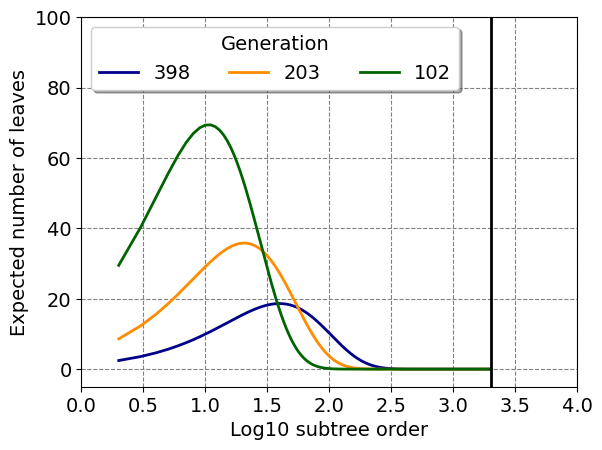

In [19]:
pngname = "leaves-plot.png"
tiffname = "leaves-plot.tiff"
jpgname = "leaves-plot.jpg"

lwd = 2
yupp = 100
colors = ["darkblue", "darkorange", "darkgreen"]

plt.figure()

n = 2000
Ks = [50, 95, 180]

for i, K in enumerate(Ks):
    num_leaves = [approx_num_leaves(n, K, j) for j in range(2, n+1)]
    plt.plot(np.log10(np.arange(2, n+1)), np.array(num_leaves) * np.arange(2, n+1), 
             label=f"K={K}", linewidth=lwd, color=colors[i])

# plt.axhline(y=1, linestyle='--', linewidth=lwd, color='black')
plt.xlabel("Log10 subtree order")
plt.ylabel("Expected number of leaves")
plt.ylim(-5, yupp)
plt.xlim(0, 4)
plt.axvline(x=np.log10(n), linewidth=lwd, color='black')

N = 10000
legend_vals = [round(hypo_cut(N, n, K, 0)) for K in Ks]
plt.grid(True, linestyle='--', color='gray')
plt.legend(title="Generation", 
           labels=legend_vals,
           ncol=3,
           frameon=True,
           fancybox=True,
           shadow=True)
# plt.savefig(pngname)
# plt.savefig(tiffname)
# plt.savefig(jpgname)
plt.show()